In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
xy = pd.read_parquet('XY_version1.parquet')

In [3]:
xy.head()

,year,area,avg_yield_maize_corn_1y,avg_yield_maize_corn_3y,avg_yield_maize_corn_6y,avg_yield_other_vegetables_fresh_nec_1y,avg_yield_other_vegetables_fresh_nec_3y,avg_yield_other_vegetables_fresh_nec_6y,avg_yield_potatoes_1y,avg_yield_potatoes_3y,...,Y_oil_palm_fruit,Y_other_vegetables_fresh_nec,Y_potatoes,Y_rice,Y_soya_beans,Y_sugar_beet,Y_sugar_cane,Y_tomatoes,Y_watermelons,Y_wheat
0,1983,Afghanistan,1665.8,1668.633333,1636.283333,6919.2,6846.166667,6561.216667,15511.4,15265.133333,...,NaN,7065.7,15764.7,2258.1,NaN,20000.0,19375.0,NaN,9754.9,1258.0
1,1984,Afghanistan,1664.1,1666.300000,1649.750000,7065.7,6959.033333,6775.366667,15764.7,15566.600000,...,NaN,7155.1,14444.4,2241.6,NaN,20000.0,19354.8,NaN,9630.0,1231.9
2,1985,Afghanistan,1661.2,1663.700000,1656.900000,7155.1,7046.666667,6897.800000,14444.4,15240.166667,...,NaN,7145.9,14090.9,2248.2,NaN,3333.3,19333.3,NaN,9556.7,1227.7
3,1986,Afghanistan,1665.2,1663.500000,1666.066667,7145.9,7122.233333,6984.200000,14090.9,14766.666667,...,NaN,7249.5,15866.7,2240.0,NaN,12500.0,20000.0,NaN,10058.8,1189.0
4,1987,Afghanistan,1687.5,1671.300000,1668.800000,7249.5,7183.500000,7071.266667,15866.7,14800.666667,...,NaN,7524.8,15500.0,2000.0,NaN,15000.0,20000.0,NaN,9952.9,1284.9


In [4]:
latlong  = pd.read_csv('coordinates_countries_full_209.csv')

In [5]:
latlong['area'] = latlong['Area'].str.replace(' ', '_')

In [6]:
latlong = latlong[['area', 'latitude', 'longitude']]

In [7]:
xy = xy.merge(latlong, on='area')

In [8]:
xy = pd.get_dummies(xy, columns=['area'])


In [9]:
xy.columns = (
    xy.columns
    .str.strip()             # remove leading/trailing spaces
    .str.replace(' ', '_')   # replace spaces
    .str.replace(r'[^A-Za-z0-9_]', '', regex=True)  # remove special chars
)

In [10]:
xy.columns.tolist()

['year',
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cuc

In [11]:
features_col =[
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cucumbers_and_gherkins_3y',
 'avg_yield_cucumbers_and_gherkins_6y',
 'avg_yield_tomatoes_1y',
 'avg_yield_tomatoes_3y',
 'avg_yield_tomatoes_6y',
 'avg_yield_bananas_1y',
 'avg_yield_bananas_3y',
 'avg_yield_bananas_6y',
 'avg_yield_cassava_fresh_1y',
 'avg_yield_cassava_fresh_3y',
 'avg_yield_cassava_fresh_6y',
 'rain_Jan',
 'rain_Feb',
 'rain_Mar',
 'rain_Apr',
 'rain_May',
 'rain_Jun',
 'rain_Jul',
 'rain_Aug',
 'rain_Sep',
 'rain_Oct',
 'rain_Nov',
 'rain_Dec',
 'avg_rain_1_3',
 'avg_rain_3_6',
 'avg_rain_6_9',
 'avg_rain_10_12',
 'avg_rain_1_12',
 'solar_Jan',
 'solar_Feb',
 'solar_Mar',
 'solar_Apr',
 'solar_May',
 'solar_Jun',
 'solar_Jul',
 'solar_Aug',
 'solar_Sep',
 'solar_Oct',
 'solar_Nov',
 'solar_Dec',
 'avg_solar_1_3',
 'avg_solar_3_6',
 'avg_solar_6_9',
 'avg_solar_10_12',
 'avg_solar_1_12',
 'temp_Jan',
 'temp_Feb',
 'temp_Mar',
 'temp_Apr',
 'temp_May',
 'temp_Jun',
 'temp_Jul',
 'temp_Aug',
 'temp_Sep',
 'temp_Oct',
 'temp_Nov',
 'temp_Dec',
 'avg_temp_1_3',
 'avg_temp_3_6',
 'avg_temp_6_9',
 'avg_temp_10_12',
 'avg_temp_1_12',
 'sum_rain_1_3',
 'sum_rain_3_6',
 'sum_rain_6_9',
 'sum_rain_10_12',
 'sum_rain_1_12',

 'latitude',
 'longitude',
 'area_Afghanistan',
 'area_Albania',
 'area_Algeria',
 'area_Angola',
 'area_Antigua_and_Barbuda',
 'area_Argentina',
 'area_Armenia',
 'area_Australia',
 'area_Austria',
 'area_Azerbaijan',
 'area_Bahamas',
 'area_Bangladesh',
 'area_Barbados',
 'area_Belarus',
 'area_Belgium',
 'area_BelgiumLuxembourg',
 'area_Belize',
 'area_Benin',
 'area_Bhutan',
 'area_Bolivia_Plurinational_State_of',
 'area_Bosnia_and_Herzegovina',
 'area_Botswana',
 'area_Brazil',
 'area_Bulgaria',
 'area_Burkina_Faso',
 'area_Burundi',
 'area_Cabo_Verde',
 'area_Cambodia',
 'area_Cameroon',
 'area_Canada',
 'area_Central_African_Republic',
 'area_Chad',
 'area_Chile',
 'area_China',
 'area_China_Taiwan_Province_of',
 'area_China_mainland',
 'area_Colombia',
 'area_Comoros',
 'area_Congo',
 'area_Costa_Rica',
 'area_Croatia',
 'area_Cuba',
 'area_Czechia',
 'area_Czechoslovakia',
 'area_Cte_dIvoire',
 'area_Democratic_Peoples_Republic_of_Korea',
 'area_Democratic_Republic_of_the_Congo',
 'area_Denmark',
 'area_Djibouti',
 'area_Dominica',
 'area_Dominican_Republic',
 'area_Ecuador',
 'area_Egypt',
 'area_El_Salvador',
 'area_Eritrea',
 'area_Eswatini',
 'area_Ethiopia',
 'area_Ethiopia_PDR',
 'area_Fiji',
 'area_France',
 'area_French_Guiana',
 'area_Gabon',
 'area_Gambia',
 'area_Georgia',
 'area_Germany',
 'area_Ghana',
 'area_Greece',
 'area_Grenada',
 'area_Guatemala',
 'area_Guinea',
 'area_GuineaBissau',
 'area_Guyana',
 'area_Haiti',
 'area_Honduras',
 'area_Hungary',
 'area_India',
 'area_Indonesia',
 'area_Iran_Islamic_Republic_of',
 'area_Iraq',
 'area_Israel',
 'area_Italy',
 'area_Jamaica',
 'area_Japan',
 'area_Jordan',
 'area_Kazakhstan',
 'area_Kenya',
 'area_Kuwait',
 'area_Kyrgyzstan',
 'area_Lao_Peoples_Democratic_Republic',
 'area_Lebanon',
 'area_Lesotho',
 'area_Libya',
 'area_Lithuania',
 'area_Luxembourg',
 'area_Madagascar',
 'area_Malawi',
 'area_Malaysia',
 'area_Maldives',
 'area_Mali',
 'area_Mauritania',
 'area_Mauritius',
 'area_Mexico',
 'area_Micronesia_Federated_States_of',
 'area_Montenegro',
 'area_Morocco',
 'area_Mozambique',
 'area_Myanmar',
 'area_Namibia',
 'area_Nepal',
 'area_Netherlands_Kingdom_of_the',
 'area_New_Caledonia',
 'area_New_Zealand',
 'area_Nicaragua',
 'area_Niger',
 'area_Nigeria',
 'area_North_Macedonia',
 'area_Oman',
 'area_Pakistan',
 'area_Panama',
 'area_Papua_New_Guinea',
 'area_Paraguay',
 'area_Peru',
 'area_Philippines',
 'area_Poland',
 'area_Portugal',
 'area_Puerto_Rico',
 'area_Qatar',
 'area_Republic_of_Korea',
 'area_Republic_of_Moldova',
 'area_Romania',
 'area_Russian_Federation',
 'area_Rwanda',
 'area_Runion',
 'area_Saint_Vincent_and_the_Grenadines',
 'area_Sao_Tome_and_Principe',
 'area_Saudi_Arabia',
 'area_Senegal',
 'area_Serbia',
 'area_Serbia_and_Montenegro',
 'area_Sierra_Leone',
 'area_Slovakia',
 'area_Slovenia',
 'area_Somalia',
 'area_South_Africa',
 'area_South_Sudan',
 'area_Spain',
 'area_Sri_Lanka',
 'area_Sudan',
 'area_Sudan_former',
 'area_Suriname',
 'area_Sweden',
 'area_Switzerland',
 'area_Syrian_Arab_Republic',
 'area_Tajikistan',
 'area_Thailand',
 'area_TimorLeste',
 'area_Togo',
 'area_Trinidad_and_Tobago',
 'area_Turkmenistan',
 'area_Trkiye',
 'area_USSR',
 'area_Uganda',
 'area_Ukraine',
 'area_United_Arab_Emirates',
 'area_United_Republic_of_Tanzania',
 'area_United_States_of_America',
 'area_Uruguay',
 'area_Uzbekistan',
 'area_Vanuatu',
 'area_Venezuela_Bolivarian_Republic_of',
 'area_Viet_Nam',
 'area_Yemen',
 'area_Yugoslav_SFR',
 'area_Zambia',
 'area_Zimbabwe']




In [12]:
 # 'Y_bananas',
 # 'Y_barley',
 # 'Y_cassava_fresh',
 # 'Y_cucumbers_and_gherkins',
 # 'Y_maize_corn',
 # 'Y_oil_palm_fruit',
 # 'Y_other_vegetables_fresh_nec',
 # 'Y_potatoes',
 # 'Y_rice',
 # 'Y_soya_beans',
 # 'Y_sugar_beet',
 # 'Y_sugar_cane',
 # 'Y_tomatoes',
 # 'Y_watermelons',
 # 'Y_wheat',

# Start Model Rice

In [13]:
xy_drop_na = xy[xy['Y_rice']>=0]

<Axes: >

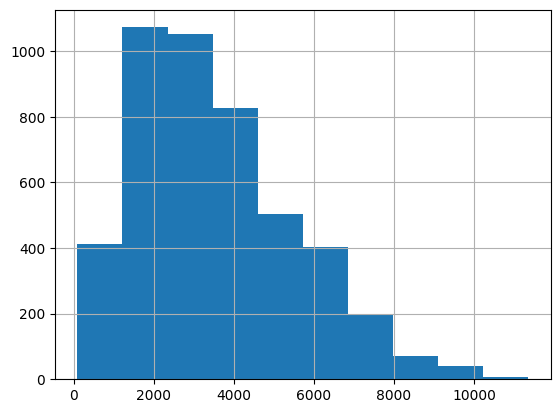

In [14]:
xy['Y_rice'].hist()

In [15]:
test_xy = xy_drop_na[xy_drop_na['year']>=2019]
train_and_validation_xy = xy_drop_na[xy_drop_na['year']<2019]

In [16]:
train_xy = train_and_validation_xy[train_and_validation_xy['year']<2014]
val_xy = train_and_validation_xy[train_and_validation_xy['year']>=2014]

In [17]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Create LightGBM dataset


train_data = lgb.Dataset(train_xy[features_col], label=train_xy['Y_rice'])
val_data = lgb.Dataset(val_xy[features_col], label=val_xy['Y_rice'], reference=train_data)


Training until validation scores don't improve for 10 rounds
[5]	train's rmse: 1615.61	valid's rmse: 1984.91
[10]	train's rmse: 1412.01	valid's rmse: 1738.88
[15]	train's rmse: 1239.86	valid's rmse: 1529.09
[20]	train's rmse: 1094.97	valid's rmse: 1349.24
[25]	train's rmse: 973.743	valid's rmse: 1196.53
[30]	train's rmse: 872.719	valid's rmse: 1069.35
[35]	train's rmse: 788.967	valid's rmse: 964.624
[40]	train's rmse: 720.145	valid's rmse: 873.996
[45]	train's rmse: 663.971	valid's rmse: 803.457
[50]	train's rmse: 618.418	valid's rmse: 745.445
[55]	train's rmse: 581.612	valid's rmse: 698.05
[60]	train's rmse: 552.004	valid's rmse: 660.116
[65]	train's rmse: 528.183	valid's rmse: 630.687
[70]	train's rmse: 509.001	valid's rmse: 607.29
[75]	train's rmse: 493.688	valid's rmse: 588.943
[80]	train's rmse: 481.155	valid's rmse: 573.991
[85]	train's rmse: 470.628	valid's rmse: 562.322
[90]	train's rmse: 462.051	valid's rmse: 553.729
[95]	train's rmse: 454.861	valid's rmse: 545.672
[100]	train

NameError: name 'plt' is not defined

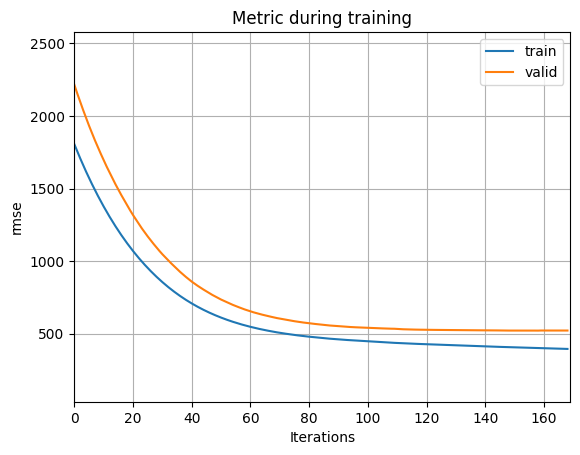

In [18]:


# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 16,
    'verbose': -1,
}

# This dict will be filled automatically
evals_result = {}

# Train the model
model = lgb.train(
    params,
    train_data,
    num_boost_round=200,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=10, verbose=True),
        lgb.log_evaluation(period=5),
        lgb.record_evaluation(evals_result),   # <-- key line
    ],
)

# Predict on validation
y_pred = model.predict(val_xy[features_col], num_iteration=model.best_iteration)
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.title("LightGBM RMSE vs Boosting Rounds")
plt.show()



In [ ]:
rmse = np.sqrt(mean_squared_error(val_xy['Y_rice'], y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 520.8519092827186


In [ ]:
train_data = lgb.Dataset(train_and_validation_xy[features_col], label=train_and_validation_xy['Y_rice'])

In [ ]:
# Train the model
# Set parameters
params = {
    'objective': 'regression',  # or 'binary'
    'metric': 'rmse',           # or 'auc' for classification
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 16,
    'verbose': -1

    # min data in leaf 20
    # feature fract 0.7
    # row_fract. 0.7
}

model_final = lgb.train(
    params,
    train_data,
    num_boost_round=185,
)

In [ ]:
y_pred_test = model_final.predict(test_xy[features_col])

In [ ]:
rmse = np.sqrt(mean_squared_error(test_xy['Y_rice'], y_pred_test))
print("Validation RMSE:", rmse)

Validation RMSE: 487.2303172980026


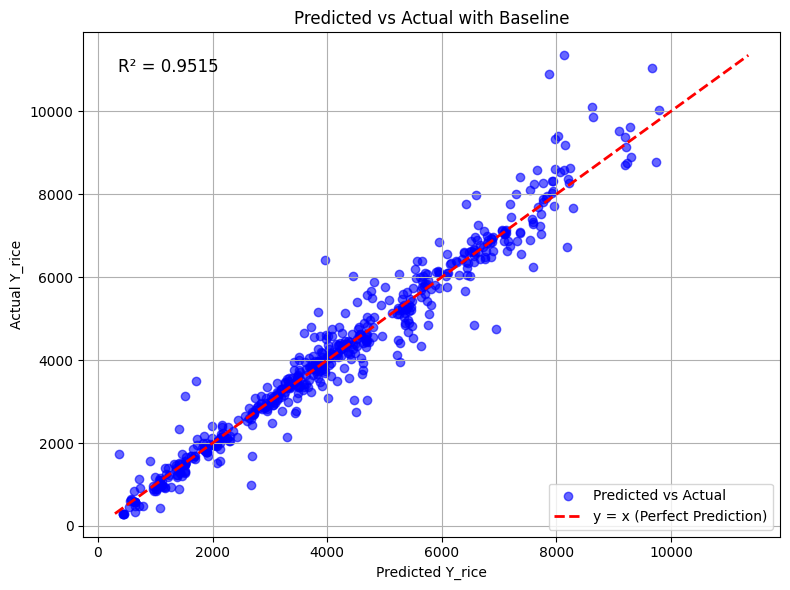

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Example DataFrame
df = pd.DataFrame()
df['actual'] = test_xy['Y_rice']
df['predict'] = y_pred_test

# Compute R²
r2 = r2_score(df['actual'], df['predict'])

# Prepare line for y = x
min_val = min(df['actual'].min(), df['predict'].min())
max_val = max(df['actual'].max(), df['predict'].max())
line = np.linspace(min_val, max_val, 100)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['predict'], df['actual'], alpha=0.6, color='blue', label='Predicted vs Actual')

# y = x line
plt.plot(line, line, color='red', linestyle='--', linewidth=2, label='y = x (Perfect Prediction)')

# Labels and formatting
plt.xlabel('Predicted Y_rice')
plt.ylabel('Actual Y_rice')
plt.title('Predicted vs Actual with Baseline')
plt.grid(True)

# Add R² text on graph
plt.text(0.05, 0.95, f"R² = {r2:.4f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mean_squared_error(test_xy['Y_rice'], y_pred_test)

237393.38209431228

In [ ]:
model_final.feature_importance()

array([ 24,  29,   6,  30,  13,  22,  31,  25,  15, 565, 290, 166,   8,
        18,  19,  43,  22,  34,   0,   1,   0,  23,  29,  15,  37,  19,
        12,   9,   3,   9,  20,  11,  38,  17,  20,  48,  45,  47,  18,
        23,  15,  17,   6,   6,  24,  20,  12,  10,  13,   7,  17,  26,
        33,  22,  16,  17,  13,  16,  10,  18,   9,  29,  21,  16,  37,
        18,   9,   8,  13,  32,  32,  30,  41,  23,  11,  14,   7,  18,
        21,  14,  16,  18,   8,   6,  21,   9,   7,  10,  16,  11,  54,
        15,   4,   4,   8,  17,   0,   0,   0,   0,   0,  15,   6,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
importance = model_final.feature_importance(importance_type='gain')  # or 'split'
feature_names = model_final.feature_name()

# Create a DataFrame
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)


In [ ]:
fi_df

,feature,importance
9,avg_yield_rice_1y,1.374994e+11
10,avg_yield_rice_3y,8.913145e+10
11,avg_yield_rice_6y,6.291137e+09
78,avg_solar_1_12,4.850332e+08
70,solar_Sep,3.756550e+08
35,avg_yield_cucumbers_and_gherkins_6y,2.909707e+08
37,avg_yield_tomatoes_3y,2.380187e+08
36,avg_yield_tomatoes_1y,2.012346e+08
15,avg_yield_wheat_1y,1.866200e+08
72,solar_Nov,1.682366e+08


In [ ]:
pd.options.display.max_rows=300